# RESEARCH QUESTION 1

## Does twitch stream affect game sales?

<b><font color = 'blue'> To answer this question we would be looking at a relationship between streaming measures on twitch and the corresponding sales of a video game</font></b>

In [1]:
# import necessary packages for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf

import urllib


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
if not os.path.exists("../data/prep/700-Combined_VG_Twitch.csv"):
    print("Missing dataset file")
else:
    print("Success!")

Success!


In [3]:
comb_df = pd.read_csv("../data/prep/700-Combined_VG_Twitch.csv")

In [4]:
comb_df = comb_df.drop(['Unnamed: 0'],axis =1)

In [5]:
comb_df.head()

,game,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio,global_sales,na_sales,eu_sales,jp_sales,other_sales,meta_critic_score,meta_user_score,release_date
0,fortnite,149623513560,9327850080,3219981,105958,7502589,284703,17748,67.95,1680000.0,1020000.0,430000.0,0.0,230000.0,81.3,3.4,2017-07-21
1,playerunknown's battlegrounds,74638243080,2566294320,1344694,14130,1847205,142019,4882,210.63,330000.0,130000.0,150000.0,0.0,50000.0,72.0,3.4,2018-12-07
2,overwatch,60273897480,2261860440,1415140,19226,2481225,114632,4299,107.20,8180000.0,3840000.0,3120000.0,170000.0,1050000.0,90.7,6.3,2016-05-24
3,grand theft auto v,53277442260,1206555540,620929,8375,1942035,106307,2794,161.33,64290000.0,26190000.0,28140000.0,1660000.0,8320000.0,97.0,8.2,2013-09-17
4,minecraft,23806348680,1182557880,558962,8066,1982171,57870,2850,99.51,14850000.0,4320000.0,6720000.0,1600000.0,2220000.0,86.3,6.9,2014-10-07


In [6]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037 entries, 0 to 3036
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   game                  3037 non-null   object 
 1   Watch_time            3037 non-null   int64  
 2   Stream_time           3037 non-null   int64  
 3   Peak_viewers          3037 non-null   int64  
 4   Peak_channels         3037 non-null   int64  
 5   Streamers             3037 non-null   int64  
 6   Average_viewers       3037 non-null   int64  
 7   Average_channels      3037 non-null   int64  
 8   Average_viewer_ratio  3037 non-null   float64
 9   global_sales          3037 non-null   float64
 10  na_sales              3037 non-null   float64
 11  eu_sales              3037 non-null   float64
 12  jp_sales              3037 non-null   float64
 13  other_sales           3037 non-null   float64
 14  meta_critic_score     3037 non-null   float64
 15  meta_user_score      

In [7]:
comb_df.describe()

,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio,global_sales,na_sales,eu_sales,jp_sales,other_sales,meta_critic_score,meta_user_score
count,3.037000e+03,3.037000e+03,3.037000e+03,3037.000000,3.037000e+03,3037.000000,3037.000000,3037.000000,3.037000e+03,3.037000e+03,3.037000e+03,3.037000e+03,3.037000e+03,3037.000000,3037.000000
mean,2.003545e+08,1.043038e+07,3.023565e+04,162.318406,1.510665e+04,402.754034,20.628581,97.948275,1.103125e+06,5.675535e+05,3.575798e+05,5.241686e+04,1.252256e+05,70.010635,7.162298
std,3.451630e+09,1.876143e+08,1.007405e+05,2121.006209,1.665289e+05,6655.894826,362.329352,211.576661,2.382326e+06,1.189378e+06,9.516350e+05,1.346396e+05,3.184453e+05,13.121514,1.360485
min,2.400000e+02,6.000000e+01,4.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,0.750000,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19.000000,0.800000
25%,1.215000e+05,7.500000e+03,3.570000e+02,3.000000,2.400000e+01,0.000000,0.000000,18.790000,1.200000e+05,6.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04,62.500000,6.500000
50%,8.373600e+05,5.910000e+04,2.515000e+03,8.000000,1.630000e+02,0.000000,0.000000,45.480000,3.600000e+05,1.800000e+05,8.000000e+04,0.000000e+00,3.000000e+04,72.000000,7.500000
75%,9.132900e+06,4.609200e+05,1.515400e+04,23.000000,1.386000e+03,16.000000,0.000000,100.110000,1.030000e+06,5.300000e+05,3.100000e+05,4.000000e+04,1.000000e+05,79.500000,8.100000
max,1.496235e+11,9.327850e+09,3.219981e+06,105958.000000,7.502589e+06,284703.000000,17748.000000,5304.900000,6.429000e+07,2.619000e+07,2.814000e+07,1.880000e+06,8.320000e+06,98.000000,9.500000


In [8]:
comb_df.corr()

,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio,global_sales,na_sales,eu_sales,jp_sales,other_sales,meta_critic_score,meta_user_score
Watch_time,1.000000,0.960855,0.736538,0.885192,0.951091,0.998525,0.961306,0.003971,0.198000,0.158491,0.218494,0.095093,0.196610,0.048731,-0.075207
Stream_time,0.960855,1.000000,0.732622,0.958654,0.969424,0.959089,0.998176,-0.001751,0.121566,0.101339,0.128112,0.060166,0.122921,0.042666,-0.075444
Peak_viewers,0.736538,0.732622,1.000000,0.737842,0.771941,0.739424,0.734568,0.090588,0.248487,0.215751,0.259518,0.110411,0.230993,0.202016,-0.014959
Peak_channels,0.885192,0.958654,0.737842,1.000000,0.923906,0.881975,0.954239,-0.001983,0.116195,0.099731,0.119545,0.046036,0.120285,0.050542,-0.087931
Streamers,0.951091,0.969424,0.771941,0.923906,1.000000,0.957076,0.976161,-0.004201,0.222082,0.181355,0.239086,0.117073,0.220596,0.071468,-0.077382
Average_viewers,0.998525,0.959089,0.739424,0.881975,0.957076,1.000000,0.962361,0.003848,0.211567,0.168165,0.234256,0.105897,0.210363,0.051262,-0.075886
Average_channels,0.961306,0.998176,0.734568,0.954239,0.976161,0.962361,1.000000,-0.002040,0.141133,0.116922,0.149313,0.072827,0.142480,0.045009,-0.076289
Average_viewer_ratio,0.003971,-0.001751,0.090588,-0.001983,-0.004201,0.003848,-0.002040,1.000000,-0.014724,-0.015256,-0.014775,0.010369,-0.013703,-0.054795,-0.035257
global_sales,0.198000,0.121566,0.248487,0.116195,0.222082,0.211567,0.141133,-0.014724,1.000000,0.952424,0.945223,0.365045,0.946753,0.246240,-0.005023
na_sales,0.158491,0.101339,0.215751,0.099731,0.181355,0.168165,0.116922,-0.015256,0.952424,1.000000,0.810904,0.252997,0.862063,0.244277,0.006905


In [9]:
comb_df.sample()

,game,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio,global_sales,na_sales,eu_sales,jp_sales,other_sales,meta_critic_score,meta_user_score,release_date
1299,no more heroes 2: desperate struggle,1502040,157920,1986,9,312,0,0,41.03,400000.0,200000.0,110000.0,40000.0,30000.0,84.0,8.9,2010-01-26


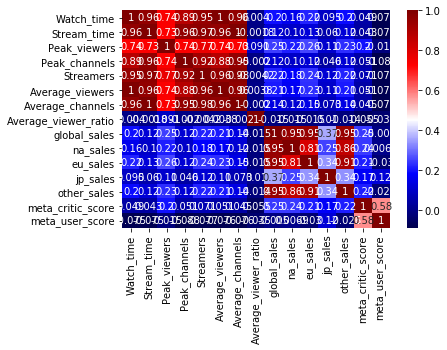

In [10]:
sns.heatmap(comb_df.corr(), cmap="seismic", annot=True)

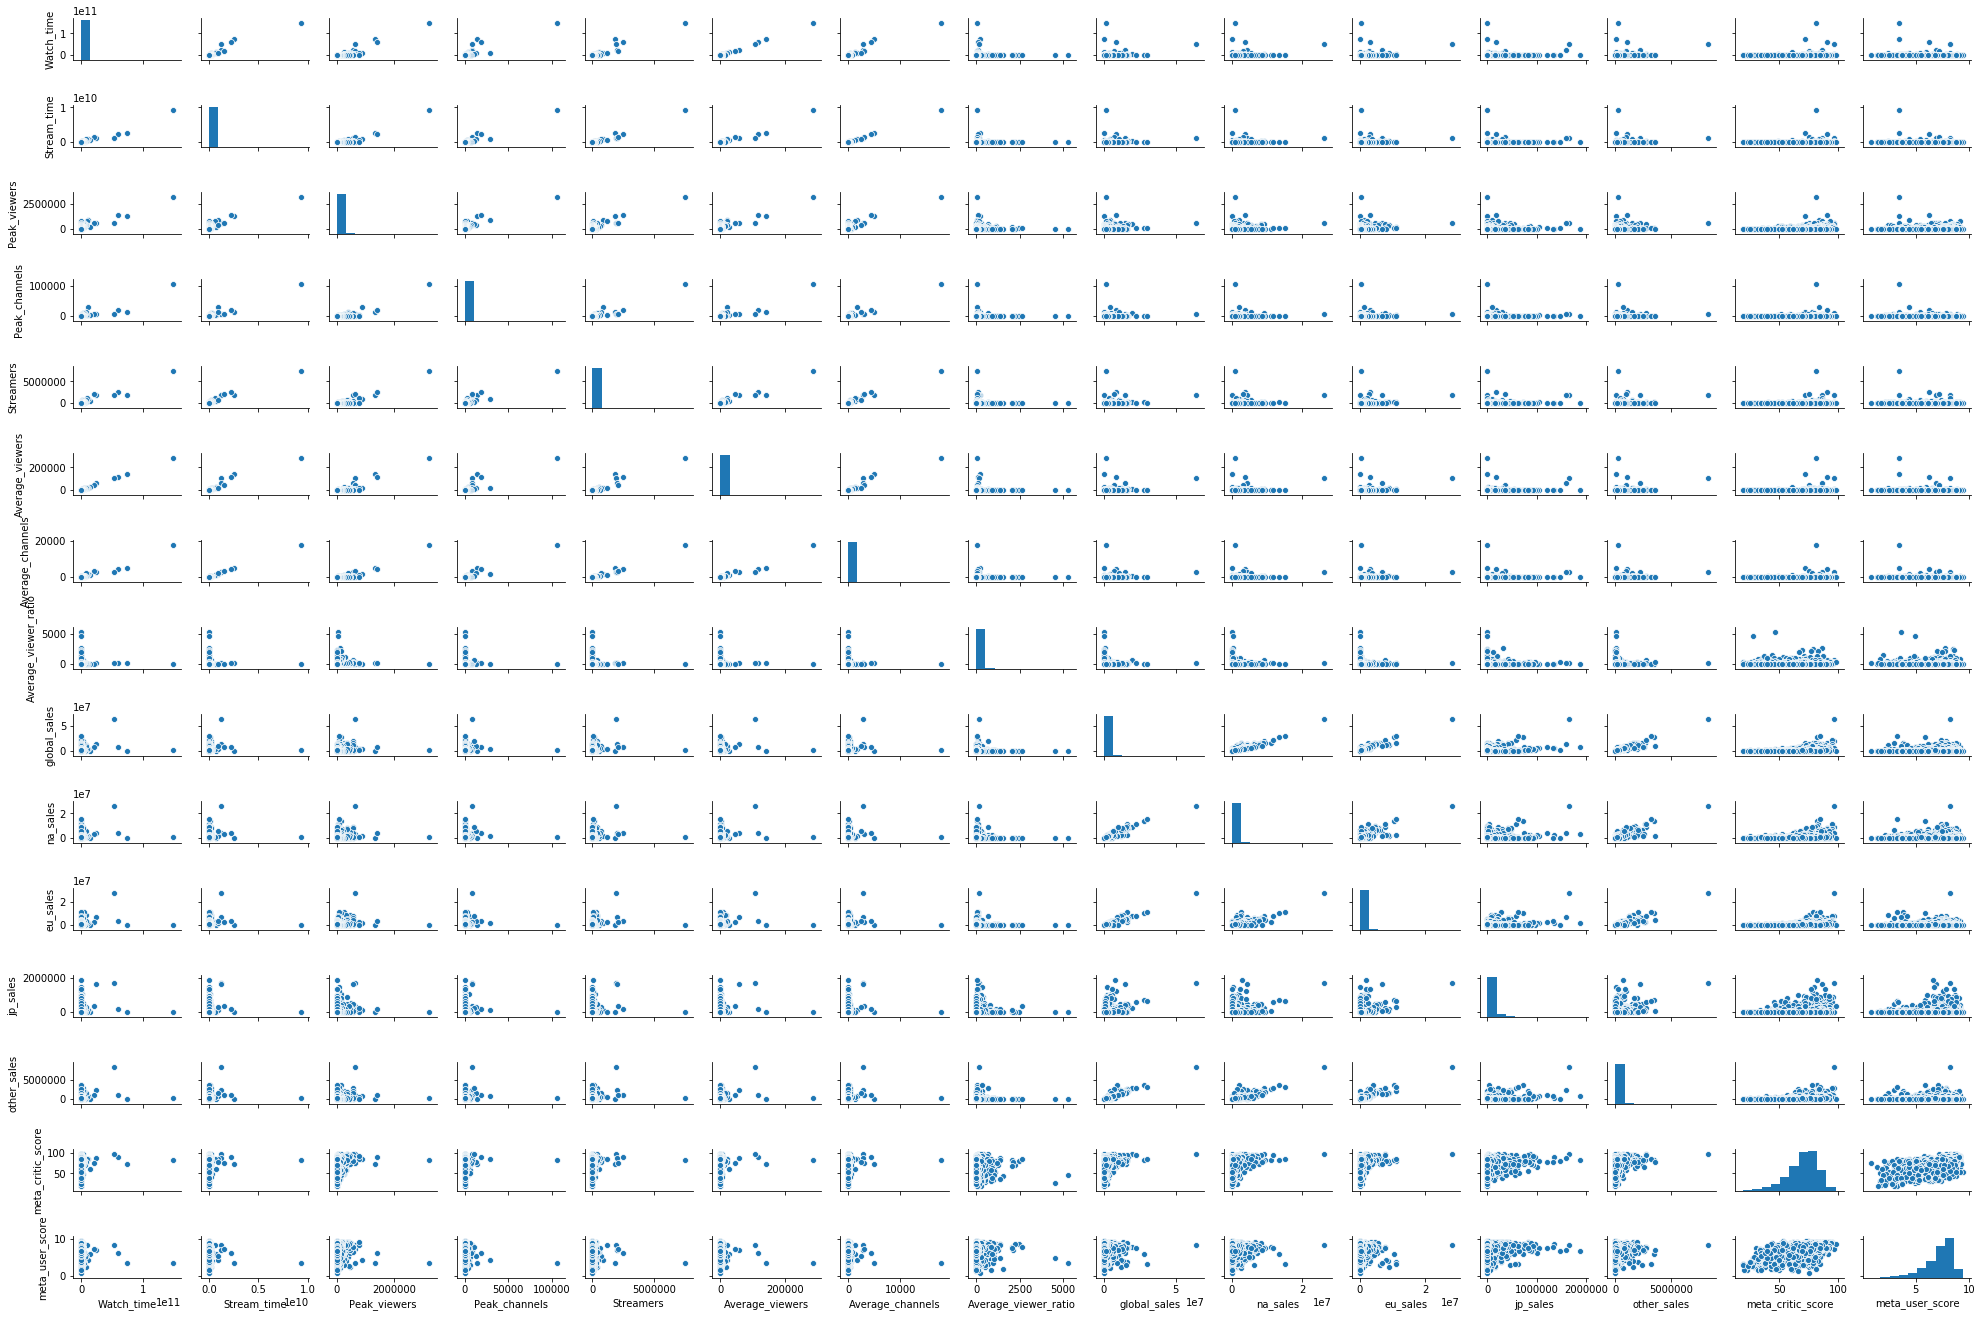

In [11]:
sns.pairplot(comb_df,height=1.2, aspect = 1.5)

<b> Dfining the models</b>

In [12]:
lm1 = smf.ols('global_sales ~ Watch_time + Stream_time + Average_channels + Average_viewers + Peak_channels + Peak_viewers + Streamers', data=comb_df)
fit = lm1.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           global_sales   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     158.2
Date:                Fri, 01 May 2020   Prob (F-statistic):          1.27e-199
Time:                        17:44:42   Log-Likelihood:                -48430.
No. Observations:                3037   AIC:                         9.688e+04
Df Residuals:                    3029   BIC:                         9.692e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.982e+05   3.98e+04     22.595      0.000     8.2e+05    9.76e+05
Watch_time           0.0023      0.000      5.653      0.000       0.001       0.003
Stream_time         -0.0875      0.007    -13.237      0.000      -0.100      -0.075
Average_channels  3.019e+04   3462.523      8.719      0.000    2.34e+04     3.7e+04
Average_viewers   -865.7464    213.082     -4.063      0.000   -1283.547    -447.946
Peak_channels      579.6520     73.151      7.924      0.000     436.221     723.083
Peak_viewers         2.1631      0.616      3.512      0.000       0.955       3.371
Streamers           15.2055      1.275     11.927      0.000      12.706      17.705
==============================================================================
Omnibus:                     2929.681   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           208519.316
Skew:                           4.481   Prob(JB):                         0.00
Kurtosis:                      42.592   Cond. No.                     3.72e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
lm2 = smf.ols('global_sales ~ Peak_channels +  + Stream_time + Watch_time + Peak_viewers + Streamers', data=comb_df)
fit2 = lm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           global_sales   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     195.8
Date:                Fri, 01 May 2020   Prob (F-statistic):          3.42e-181
Time:                        17:44:42   Log-Likelihood:                -48478.
No. Observations:                3037   AIC:                         9.697e+04
Df Residuals:                    3031   BIC:                         9.700e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.917e+05   4.04e+04     22.090      0.000    8.13e+05    9.71e+05
Peak_channels   515.4536     73.452      7.018      0.000     371.433     659.474
Stream_time      -0.0329      0.002    -21.804      0.000      -0.036      -0.030
Watch_time        0.0006   4.71e-05     12.949      0.000       0.001       0.001
Peak_viewers      1.3418      0.620      2.165      0.030       0.126       2.557
Streamers        20.4036      1.023     19.946      0.000      18.398      22.409
==============================================================================
Omnibus:                     2968.790   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237258.487
Skew:                           4.536   Prob(JB):                         0.00
Kurtosis:                      45.340   Cond. No.                     3.71e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

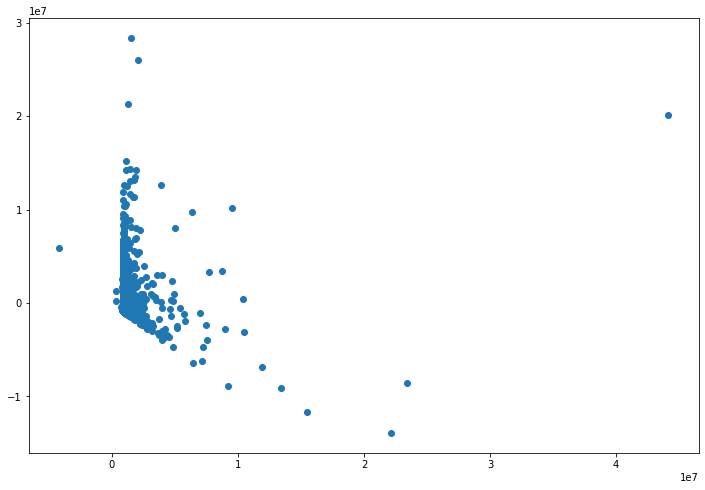

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);

<b><font color = 'blue'>We can safely say there is not a linear relationship between our features and target at this scale. </font></b>

# TOP GAMES FROM 2016-2018

<b>We are now going to see the top 100 selling games in the years 2016-2018 and see if we get a better result</b>

## 2018

In [15]:
# read the chart from the vg chart 
url = 'http://www.vgchartz.com/yearly/2018/Global/'

In [16]:
tables = pd.read_html(url)

In [17]:
tables[1]

,Pos,Game,Game.1,Game.2,Weeks,Yearly,Total
0,1,Red Dead Redemption 2 (PS4)Take-Two Interactiv...,Red Dead Redemption 2 (PS4)Take-Two Interactiv...,Red Dead Redemption 2 (PS4)Take-Two Interactiv...,10,13940203,13940203
1,2,"Call of Duty: Black Ops IIII (PS4)Activision, ...","Call of Duty: Black Ops IIII (PS4)Activision, ...","Call of Duty: Black Ops IIII (PS4)Activision, ...",12,9317241,9317241
2,3,"FIFA 19 (PS4)Electronic Arts, Sports","FIFA 19 (PS4)Electronic Arts, Sports","FIFA 19 (PS4)Electronic Arts, Sports",14,9147505,9147505
3,4,"Super Smash Bros. (2018) (NS)Nintendo, Fighting","Super Smash Bros. (2018) (NS)Nintendo, Fighting","Super Smash Bros. (2018) (NS)Nintendo, Fighting",4,8951009,8951009
4,5,Spider-Man (PS4) (PS4)Sony Interactive Enterta...,Spider-Man (PS4) (PS4)Sony Interactive Enterta...,Spider-Man (PS4) (PS4)Sony Interactive Enterta...,17,8757859,8757859
...,...,...,...,...,...,...,...
95,96,Farming Simulator 19 (PC)Focus Home Interactiv...,Farming Simulator 19 (PC)Focus Home Interactiv...,Farming Simulator 19 (PC)Focus Home Interactiv...,6,583425,583425
96,97,"Bayonetta 2 (NS)Nintendo, Action","Bayonetta 2 (NS)Nintendo, Action","Bayonetta 2 (NS)Nintendo, Action",46,573643,573643
97,98,"Fallout 4 (PS4)Bethesda Softworks, Role-Playing","Fallout 4 (PS4)Bethesda Softworks, Role-Playing","Fallout 4 (PS4)Bethesda Softworks, Role-Playing",164,568545,8480129
98,99,"Starlink: Battle for Atlas (NS)Ubisoft, Action...","Starlink: Battle for Atlas (NS)Ubisoft, Action...","Starlink: Battle for Atlas (NS)Ubisoft, Action...",11,567755,567755


In [18]:
sales_2018 = pd.DataFrame(tables[1])

In [19]:
# drop unncessary columns
sales_2018 = sales_2018.drop(['Pos','Game.1','Game.2'],axis =1)

In [20]:
# rename the column so we could match it with twitch dataset
sales_2018 = sales_2018.rename(columns={'Game':'game'})

In [21]:
sales_2018['game'] = sales_2018['game'].str.lower()

In [22]:
# I found this function online to clean the game title and I am using it
def game_title(game):
    return game.split('(')[0].strip()

In [23]:
sales_2018.game = sales_2018.game.apply(game_title)

In [24]:
sales_2018 = sales_2018.groupby(['game'])['Yearly'].sum().sort_values(ascending=False).reset_index()

In [25]:
sales_2018.head()

,game,Yearly
0,red dead redemption 2,19711350
1,call of duty: black ops iiii,14167945
2,fifa 19,12119202
3,super smash bros.,8951009
4,spider-man,8757859


## 2017

In [26]:
url2 = 'http://www.vgchartz.com/yearly/2017/Global/'

In [27]:
tables2 = pd.read_html(url2)

In [28]:
tables2[1]

,Pos,Game,Game.1,Game.2,Weeks,Yearly,Total
0,1,"Call of Duty: WWII (PS4)Activision, Shooter","Call of Duty: WWII (PS4)Activision, Shooter","Call of Duty: WWII (PS4)Activision, Shooter",9,11665414,11665414
1,2,"FIFA 18 (PS4)Electronic Arts, Sports","FIFA 18 (PS4)Electronic Arts, Sports","FIFA 18 (PS4)Electronic Arts, Sports",14,10107910,10107910
2,3,"Super Mario Odyssey (NS)Nintendo, Platform","Super Mario Odyssey (NS)Nintendo, Platform","Super Mario Odyssey (NS)Nintendo, Platform",10,7715648,7715648
3,4,"Mario Kart 8 Deluxe (NS)Nintendo, Racing","Mario Kart 8 Deluxe (NS)Nintendo, Racing","Mario Kart 8 Deluxe (NS)Nintendo, Racing",36,6357868,6357868
4,5,The Legend of Zelda: Breath of the Wild (NS)Ni...,The Legend of Zelda: Breath of the Wild (NS)Ni...,The Legend of Zelda: Breath of the Wild (NS)Ni...,44,6073816,6073816
...,...,...,...,...,...,...,...
95,96,"Hitman (2016) (PS4)Square Enix, Action","Hitman (2016) (PS4)Square Enix, Action","Hitman (2016) (PS4)Square Enix, Action",48,624358,669628
96,97,Pokemon Omega Ruby/Pokemon Alpha Sapphire (3DS...,Pokemon Omega Ruby/Pokemon Alpha Sapphire (3DS...,Pokemon Omega Ruby/Pokemon Alpha Sapphire (3DS...,163,605920,12628474
97,98,"Gears of War 4 (XOne)Microsoft Game Studios, S...","Gears of War 4 (XOne)Microsoft Game Studios, S...","Gears of War 4 (XOne)Microsoft Game Studios, S...",64,600547,3257711
98,99,Uncharted: The Nathan Drake Collection (PS4)So...,Uncharted: The Nathan Drake Collection (PS4)So...,Uncharted: The Nathan Drake Collection (PS4)So...,117,600046,5421937


In [29]:
sales_2017 = pd.DataFrame(tables2[1])

In [30]:
sales_2017 = sales_2017.drop(['Pos','Game.1','Game.2'],axis =1)

In [31]:
sales_2017 = sales_2017.rename(columns={'Game':'game'})

In [32]:
sales_2017['game'] = sales_2017['game'].str.lower()

In [33]:
sales_2017.game = sales_2017.game.apply(game_title)

In [34]:
sales_2017 = sales_2017.groupby(['game'])['Yearly'].sum().sort_values(ascending=False).reset_index()

In [35]:
sales_2017.head()

,game,Yearly
0,call of duty: wwii,17105792
1,fifa 18,12761180
2,super mario odyssey,7715648
3,the legend of zelda: breath of the wild,7339790
4,mario kart 8 deluxe,6357868


## 2016

In [36]:
url3 = 'http://www.vgchartz.com/yearly/2016/Global/'

In [37]:
tables3 = pd.read_html(url3)

In [38]:
tables3[1]

,Pos,Game,Game.1,Game.2,Weeks,Yearly,Total
0,1,"Pokemon Sun/Moon (3DS)Nintendo, Role-Playing","Pokemon Sun/Moon (3DS)Nintendo, Role-Playing","Pokemon Sun/Moon (3DS)Nintendo, Role-Playing",7,12034530,12034530
1,2,"FIFA 17 (PS4)Electronic Arts, Sports","FIFA 17 (PS4)Electronic Arts, Sports","FIFA 17 (PS4)Electronic Arts, Sports",14,9581584,9581584
2,3,Uncharted (PS4) (PS4)Sony Computer Entertainme...,Uncharted (PS4) (PS4)Sony Computer Entertainme...,Uncharted (PS4) (PS4)Sony Computer Entertainme...,34,8298741,8298741
3,4,Call of Duty: Infinite Warfare (PS4)Activision...,Call of Duty: Infinite Warfare (PS4)Activision...,Call of Duty: Infinite Warfare (PS4)Activision...,9,6195297,6195297
4,5,"Battlefield 1 (PS4)Electronic Arts, Shooter","Battlefield 1 (PS4)Electronic Arts, Shooter","Battlefield 1 (PS4)Electronic Arts, Shooter",11,5961774,5961774
...,...,...,...,...,...,...,...
95,96,"Pokemon Super Mystery Dungeon (3DS)Nintendo, R...","Pokemon Super Mystery Dungeon (3DS)Nintendo, R...","Pokemon Super Mystery Dungeon (3DS)Nintendo, R...",68,675679,1350612
96,97,"FIFA 16 (XOne)Electronic Arts, Sports","FIFA 16 (XOne)Electronic Arts, Sports","FIFA 16 (XOne)Electronic Arts, Sports",67,665661,3232568
97,98,"Overwatch (PC)Activision, Shooter","Overwatch (PC)Activision, Shooter","Overwatch (PC)Activision, Shooter",32,662744,662744
98,99,"Tomodachi Life (3DS)Nintendo, Simulation","Tomodachi Life (3DS)Nintendo, Simulation","Tomodachi Life (3DS)Nintendo, Simulation",195,656601,5327414


In [39]:
sales_2016 = pd.DataFrame(tables3[1])

In [40]:
sales_2016 = sales_2016.drop(['Pos','Game.1','Game.2'],axis =1)

In [41]:
sales_2016 = sales_2016.rename(columns={'Game':'game'})

In [42]:
sales_2016['game'] = sales_2016['game'].str.lower()

In [43]:
sales_2016.game = sales_2016.game.apply(game_title)

In [44]:
sales_2016 = sales_2016.groupby(['game'])['Yearly'].sum().sort_values(ascending=False).reset_index()

In [45]:
sales_2016.head()

,game,Yearly
0,fifa 17,13915028
1,pokemon sun/moon,12034530
2,battlefield 1,10181431
3,call of duty: infinite warfare,10064882
4,uncharted,8298741


In [46]:
# combining all the three years
combined_sales = pd.concat([sales_2018, sales_2017, sales_2016], axis=0)

In [47]:
combined_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   game    231 non-null    object
 1   Yearly  231 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [48]:
combined_sales = combined_sales.groupby(['game'])['Yearly'].sum().reset_index()

In [49]:
twitch_df= pd.read_csv("../data/analysis/twitch_final.csv")

In [50]:
twitch_df.head()

,Unnamed: 0,Game,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,0,League of Legends,193235523120,3573629520,4545117,17511,2389081,483934,8476,235.49
1,1,Fortnite,149623513560,9327850080,3219981,105958,7502589,284703,17748,67.95
2,2,Dota 2,88230167100,909440340,2956116,5402,577733,223539,2263,400.53
3,3,Counter-Strike: Global Offensive,79637110860,1674087780,3737745,10442,2102616,210449,4206,201.83
4,4,PLAYERUNKNOWN'S BATTLEGROUNDS,74638243080,2566294320,1344694,14130,1847205,142019,4882,210.63


In [51]:
twitch_df = twitch_df.drop(['Unnamed: 0'],axis=1)

In [52]:
twitch_df = twitch_df.rename(columns={'Game': 'game'})

In [53]:
twitch_df['game'] = twitch_df['game'].str.lower()

In [54]:
comb_df = pd.merge(combined_sales, twitch_df, on='game')

In [55]:
comb_df.corr()

,Yearly,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
Yearly,1.000000,0.146443,0.084275,0.206412,0.117662,0.190362,0.155737,0.096035,0.120694
Watch_time,0.146443,1.000000,0.960309,0.884068,0.882195,0.953699,0.998676,0.962894,0.019593
Stream_time,0.084275,0.960309,1.000000,0.884080,0.959439,0.973991,0.957717,0.998771,-0.019049
Peak_viewers,0.206412,0.884068,0.884080,1.000000,0.865814,0.890026,0.883624,0.883593,0.115761
Peak_channels,0.117662,0.882195,0.959439,0.865814,1.000000,0.921679,0.876654,0.953968,-0.020215
Streamers,0.190362,0.953699,0.973991,0.890026,0.921679,1.000000,0.958552,0.981254,-0.031558
Average_viewers,0.155737,0.998676,0.957717,0.883624,0.876654,0.958552,1.000000,0.962475,0.019927
Average_channels,0.096035,0.962894,0.998771,0.883593,0.953968,0.981254,0.962475,1.000000,-0.020977
Average_viewer_ratio,0.120694,0.019593,-0.019049,0.115761,-0.020215,-0.031558,0.019927,-0.020977,1.000000


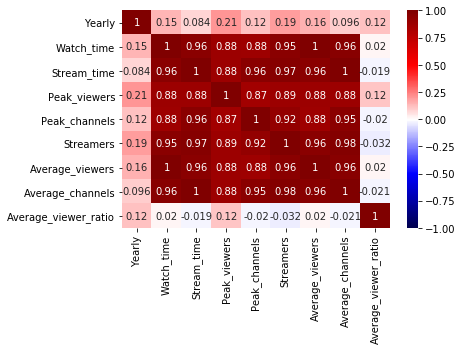

In [56]:
sns.heatmap(comb_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

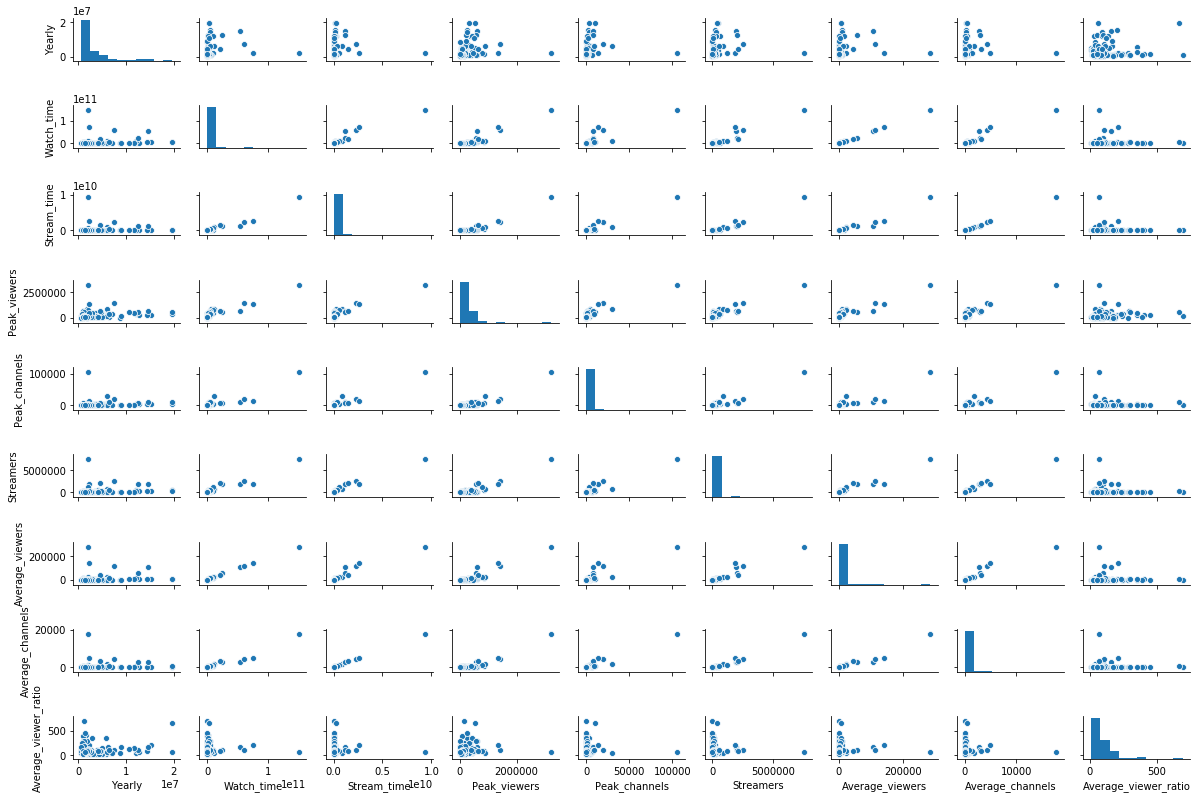

In [57]:
sns.pairplot(comb_df, height=1.2, aspect=1.5);

In [58]:
lm3 = smf.ols('Yearly ~ Watch_time + Stream_time + Average_channels + Average_viewers + Peak_channels + Peak_viewers + Streamers', data=comb_df)
fit = lm3.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Yearly   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     9.983
Date:                Fri, 01 May 2020   Prob (F-statistic):           7.54e-10
Time:                        17:45:02   Log-Likelihood:                -2159.1
No. Observations:                 132   AIC:                             4334.
Df Residuals:                     124   BIC:                             4357.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.812e+06   4.09e+05      4.428      0.000       1e+06    2.62e+06
Watch_time        3.544e-05      0.001      0.053      0.958      -0.001       0.001
Stream_time          0.0003      0.015      0.022      0.983      -0.029       0.030
Average_channels -1.081e+04   8317.362     -1.300      0.196   -2.73e+04    5653.567
Average_viewers    108.3130    359.136      0.302      0.763    -602.517     819.143
Peak_channels      465.0539    125.705      3.700      0.000     216.249     713.859
Peak_viewers        -0.0630      2.012     -0.031      0.975      -4.044       3.918
Streamers           13.7093      2.664      5.146      0.000       8.436      18.982
==============================================================================
Omnibus:                       57.191   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.693
Skew:                           1.738   Prob(JB):                     6.97e-34
Kurtosis:                       6.960   Cond. No.                     2.45e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

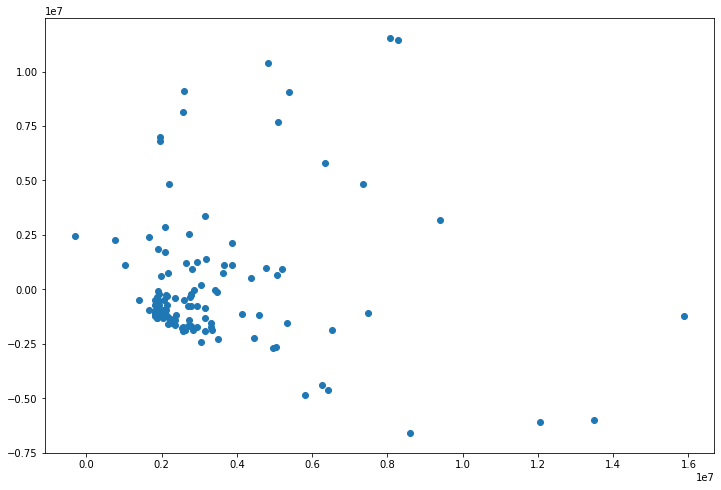

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);

<b><font color = 'blue'> 
This is better than what we saw before but we still see much of the same, strong multiple correlation. Weak signal between many of the streaming metrics and our target again,and an even stronger signal between peak channels and target.</font></b>

<b><font color ='green'>Instead of looking at 3 years of data, now I am going to isolate a single year of data and see if our results improve.</font></b>

##  LOOK AT 2018

In [60]:
twitch_2018 = pd.read_csv("../data/raw/Twitch_2018/Twitch_2018/Twitch_2018/twitch_2018.csv")

In [61]:
twitch_2018 = twitch_2018.drop(['Unnamed: 0'],axis = 1)
twitch_2018 = twitch_2018.drop(['Unnamed: 0.1'],axis = 1)
twitch_2018 = twitch_2018.drop(['Unnamed: 1'],axis = 1) 

In [62]:
twitch_2018.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio'
},inplace = True)

In [63]:
twitch_2018.head()

,Average_channels,Average_viewer_ratio,Average_viewers,game,Peak_channels,Peak_viewers,Stream_time,Streamers,Unnamed: 0.1.1,Unnamed: 11,Watch_time
0,14,71.25,1041,Artifact,1590,67321,7679280,12899,NaN,Artifact,547156380
1,85,12.13,1039,Ring Of Elysium,937,51585,45019140,88485,NaN,Ring Of Elysium,546117720
2,59,17.37,1037,World of Warships,152,18204,31383420,26577,NaN,World of Warships,545052120
3,18,56.33,1035,Age of Empires II,53,45645,9658200,13603,NaN,Age of Empires II,544093140
4,25,40.74,1033,The Legend of Zelda: Ocarina of Time,141,152961,13330980,10669,NaN,The Legend of Zelda: Ocarina of Time,543097980


In [64]:
twitch_2018['game'] = twitch_2018['game'].str.lower()

In [65]:
comb_2018 = pd.merge(sales_2018, twitch_2018, on='game')

In [66]:
comb_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   game                  180 non-null    object 
 1   Yearly                180 non-null    int64  
 2   Average_channels      180 non-null    int64  
 3   Average_viewer_ratio  180 non-null    float64
 4   Average_viewers       180 non-null    int64  
 5   Peak_channels         180 non-null    int64  
 6   Peak_viewers          180 non-null    int64  
 7   Stream_time           180 non-null    int64  
 8   Streamers             180 non-null    int64  
 9   Unnamed: 0.1.1        120 non-null    object 
 10  Unnamed: 11           180 non-null    object 
 11  Watch_time            180 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 18.3+ KB


In [67]:
comb_2018.corr()

,Yearly,Average_channels,Average_viewer_ratio,Average_viewers,Peak_channels,Peak_viewers,Stream_time,Streamers,Watch_time
Yearly,1.000000,-0.033248,-0.011808,-0.025837,0.146451,0.126943,-0.033256,-0.017317,-0.025835
Average_channels,-0.033248,1.000000,-0.096595,0.989940,0.936873,0.904913,1.000000,0.993506,0.989940
Average_viewer_ratio,-0.011808,-0.096595,1.000000,-0.078655,-0.117531,-0.045569,-0.096643,-0.112200,-0.078650
Average_viewers,-0.025837,0.989940,-0.078655,1.000000,0.918858,0.919910,0.989936,0.985062,1.000000
Peak_channels,0.146451,0.936873,-0.117531,0.918858,1.000000,0.918842,0.936870,0.933752,0.918859
Peak_viewers,0.126943,0.904913,-0.045569,0.919910,0.918842,1.000000,0.904911,0.913464,0.919910
Stream_time,-0.033256,1.000000,-0.096643,0.989936,0.936870,0.904911,1.000000,0.993511,0.989936
Streamers,-0.017317,0.993506,-0.112200,0.985062,0.933752,0.913464,0.993511,1.000000,0.985062
Watch_time,-0.025835,0.989940,-0.078650,1.000000,0.918859,0.919910,0.989936,0.985062,1.000000


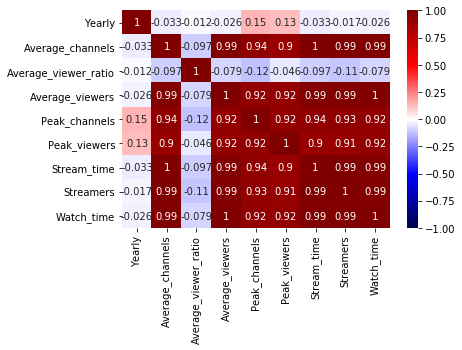

In [68]:
sns.heatmap(comb_2018.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

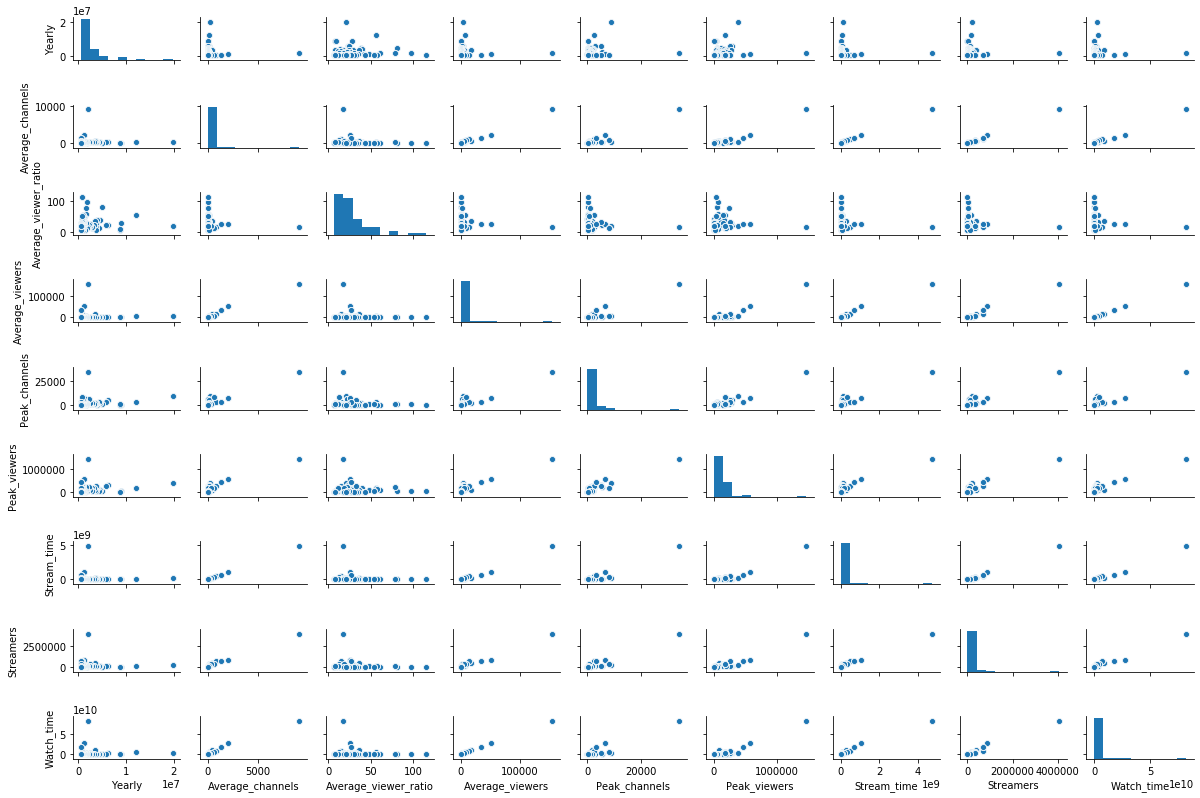

In [69]:
sns.pairplot(comb_2018, height=1.2, aspect=1.5)

In [70]:
lm4 = smf.ols('Yearly ~ Watch_time + Stream_time + Peak_viewers + Peak_channels + Streamers + Average_viewers + Average_channels + Average_viewer_ratio', data=comb_2018)
fit = lm4.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Yearly   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     9.097
Date:                Fri, 01 May 2020   Prob (F-statistic):           2.20e-10
Time:                        17:45:15   Log-Likelihood:                -2925.1
No. Observations:                 180   AIC:                             5868.
Df Residuals:                     171   BIC:                             5897.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.004e+06    6.7e+05      1.499      0.136   -3.18e+05    2.33e+06
Watch_time               2.3908      1.621      1.475      0.142      -0.808       5.590
Stream_time             -0.5815      1.491     -0.390      0.697      -3.524       2.361
Peak_viewers             3.9001      3.487      1.118      0.265      -2.984      10.784
Peak_channels          891.9729    175.364      5.086      0.000     545.816    1238.129
Streamers                4.6454      3.793      1.225      0.222      -2.841      12.132
Average_viewers      -1.256e+06   8.52e+05     -1.475      0.142   -2.94e+06    4.25e+05
Average_channels      2.978e+05   7.83e+05      0.380      0.704   -1.25e+06    1.84e+06
Average_viewer_ratio -4883.5018   1.12e+04     -0.436      0.663    -2.7e+04    1.72e+04
==============================================================================
Omnibus:                       52.133   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.088
Skew:                           1.322   Prob(JB):                     7.54e-25
Kurtosis:                       5.796   Cond. No.                     5.20e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
lm5 = smf.ols('Yearly ~ Stream_time + Peak_viewers + Peak_channels + Streamers + Average_channels', data=comb_2018)
fit2 = lm5.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Yearly   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     13.80
Date:                Fri, 01 May 2020   Prob (F-statistic):           2.37e-11
Time:                        17:45:15   Log-Likelihood:                -2927.0
No. Observations:                 180   AIC:                             5866.
Df Residuals:                     174   BIC:                             5885.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.548e+06    4.7e+05      3.291      0.001    6.19e+05    2.48e+06
Stream_time         -0.4967      1.443     -0.344      0.731      -3.344       2.351
Peak_viewers         5.1630      2.816      1.833      0.068      -0.395      10.721
Peak_channels      874.2912    147.335      5.934      0.000     583.497    1165.085
Streamers            3.6727      3.718      0.988      0.325      -3.665      11.010
Average_channels  2.553e+05   7.58e+05      0.337      0.737   -1.24e+06    1.75e+06
==============================================================================
Omnibus:                       58.705   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.241
Skew:                           1.441   Prob(JB):                     9.58e-31
Kurtosis:                       6.182   Cond. No.                     2.59e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

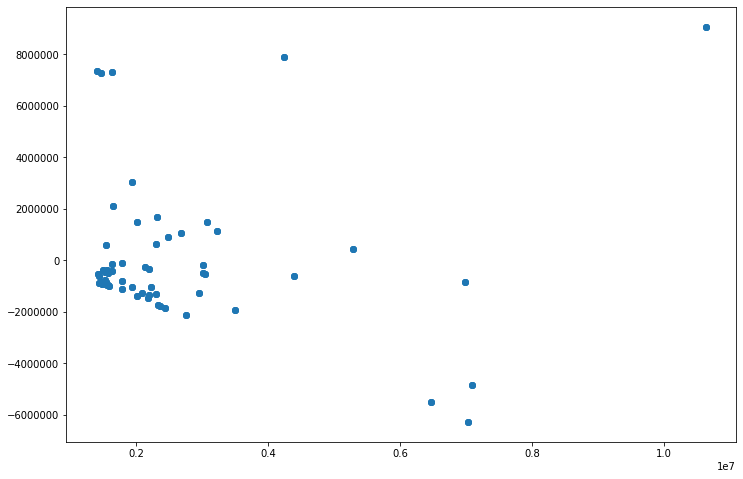

In [72]:
plt.figure(figsize=(12,8))
plt.scatter(fit2.predict(), fit2.resid);

<b><font color = 'blue'>I can see that we have a strong linear model.</font></b>

### Now lets compare Month to Month Sales 

<b><font color = 'blue'>We look at monthly sales and see if we see any significant relationship between the features and target when we look at the first 4 weeks of release only.</font></b>

<b>January</b>

In [73]:
url = 'http://www.vgchartz.com/weekly/43128/Global/'

In [74]:
tables = pd.read_html(url)

In [75]:
jan_df = pd.DataFrame(tables[1])

In [76]:
jan_df =jan_df.rename(columns = {'Game': 'game'})

In [77]:
jan_df['game'] = jan_df['game'].apply(game_title)

In [78]:
jan_df['game'] = jan_df['game'].str.lower()

In [79]:
jan_filtered =  jan_df.loc[jan_df['Week #'] <=4]

In [80]:
jan_filtered = jan_filtered.dropna(subset=['Total'])

In [81]:
jan_df = jan_filtered.groupby(['game'])['Total'].sum().sort_values(ascending=False).reset_index()

In [82]:
jan_df

,game,Total
0,monster hunter: world,2475315.0
1,dragon ball fighter z,555081.0
2,the inpatient,44768.0
3,pokemon crystal version,22071.0


In [83]:
jan_df['game'] = jan_df['game'].replace(['dragon ball fighter z'], 'dragon ball fighterz')

In [84]:
jan_df['game'] = jan_df['game'].replace(['monster hunter: world'], 'monster hunter world')

In [85]:
jan_df['game'] = jan_df['game'].replace(['pokemon crystal version'], 'pokémon crystal')

In [86]:
twitch_jan = pd.read_csv("../data/raw/twitch_january")

In [87]:
twitch_jan.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [88]:
twitch_jan = twitch_jan.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [89]:
twitch_jan['game'] = twitch_jan['game'].str.lower()

In [90]:
comb_jan = pd.merge(jan_df, twitch_jan, on='game')

In [91]:
comb_jan

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,monster hunter world,2475315.0,740393160,13561920,169921,2525,56100,16608,304,54.59
1,dragon ball fighterz,555081.0,252120180,6096480,50130,1894,23980,5655,136,41.36
2,the inpatient,44768.0,6857760,44460,35578,19,330,153,0,154.25


<b>February</b>

In [92]:
url = 'http://www.vgchartz.com/weekly/43156/Global/'

In [93]:
tables = pd.read_html(url)

In [94]:
feb_df = pd.DataFrame(tables[1])

In [95]:
feb_df =feb_df.rename(columns = {'Game': 'game'})

In [96]:
feb_df['game'] = feb_df['game'].apply(game_title)

In [97]:
feb_df['game'] = feb_df['game'].str.lower()

In [98]:
feb_filtered =  feb_df.loc[feb_df['Week #'] <=4]

In [99]:
feb_filtered = feb_filtered.dropna(subset=['Total'])

In [100]:
feb_df = feb_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()

In [101]:
feb_df

,game,Total
0,shadow of the colossus,596178.0
1,ea sports ufc 3,373854.0
2,kingdom come: deliverance,266058.0
3,bayonetta 2,236650.0
4,dynasty warriors 9,221284.0
5,sword art online: fatal bullet,154942.0
6,secret of mana,149875.0
7,metal gear survive,83951.0
8,girls und panzer: dream tank match,42160.0
9,senran kagura burst re:newal,25091.0


In [102]:
twitch_feb = pd.read_csv("../data/raw/twitch_february")

In [103]:
twitch_feb.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [104]:
twitch_feb = twitch_feb.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [105]:
twitch_feb['game'] = twitch_feb['game'].str.lower()

In [106]:
comb_feb = pd.merge(feb_df, twitch_feb, on='game')

In [107]:
comb_feb

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,shadow of the colossus,596178.0,184264560,2623560,69742,521,10414,4576,65,70.23
1,ea sports ufc 3,373854.0,56193840,531120,44939,44,4158,1395,13,105.80
2,kingdom come: deliverance,266058.0,634765020,11278140,211281,1561,20465,15766,280,56.28
3,bayonetta 2,236650.0,5414580,170940,6439,28,470,134,4,31.68
4,dynasty warriors 9,221284.0,12164340,791520,7026,129,1786,302,19,15.37
5,sword art online: fatal bullet,154942.0,18921420,1796040,35909,585,4768,469,44,10.54
6,secret of mana,149875.0,25836540,1515300,9936,407,3907,641,37,17.05
7,metal gear survive,83951.0,47458440,1882440,44890,331,4957,1178,46,25.21
8,girls und panzer: dream tank match,42160.0,2733420,25380,8827,19,79,67,0,107.70


<b>March</b>

In [108]:
url = 'http://www.vgchartz.com/weekly/43191/Global/'

In [109]:
tables = pd.read_html(url)

In [110]:
mar_df = pd.DataFrame(tables[1])

In [111]:
mar_df =mar_df.rename(columns = {'Game': 'game'})

In [112]:
mar_df['game'] = mar_df['game'].apply(game_title)

In [113]:
mar_df['game'] = mar_df['game'].str.lower()

In [114]:
mar_filtered =  mar_df.loc[mar_df['Week #'] <=5]

In [115]:
mar_filtered = mar_filtered.dropna(subset=['Total'])

In [116]:
mar_df = mar_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()

In [117]:
mar_df

,game,Total
0,far cry 5,2465970.0
1,kirby,878071.0
2,mlb the show 18,412691.0
3,ni no kuni ii: revenant kingdom,364385.0
4,sea of thieves,337986.0
5,great detective pikachu,158998.0
6,a way out,143994.0
7,super robot wars x,142093.0
8,mx vs atv all out,27203.0


In [118]:
mar_df['game'] = mar_df['game'].replace(['kirby'], 'kirby: star allies')

In [119]:
mar_df['game'] = mar_df['game'].replace(['great detective pikachu'], 'detective pikachu')

In [120]:
twitch_mar = pd.read_csv("../data/raw/twitch_march")

In [121]:
twitch_mar.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [122]:
twitch_mar = twitch_mar.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [123]:
twitch_mar['game'] = twitch_mar['game'].str.lower()

In [124]:
comb_mar = pd.merge(mar_df, twitch_mar, on='game')

In [125]:
comb_mar

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,far cry 5,2465970.0,613083180,11496480,258270,2864,46193,13752,257,53.33
1,kirby: star allies,878071.0,23374020,559020,24135,186,1985,524,12,41.81
2,mlb the show 18,412691.0,23535600,601500,8924,199,3965,527,13,39.13
3,ni no kuni ii: revenant kingdom,364385.0,57513840,2437980,30369,528,6872,1290,54,23.59
4,sea of thieves,337986.0,934015560,32591880,255998,4908,66327,20951,731,28.66
5,detective pikachu,158998.0,3633240,43320,2262,21,149,81,0,83.87
6,a way out,143994.0,325389720,5382300,233484,1587,21244,7299,120,60.46
7,super robot wars x,142093.0,5171460,139980,2901,63,178,116,3,36.94


<b>April</b>

In [126]:
url = 'http://www.vgchartz.com/weekly/43219/Global/'

In [127]:
tables = pd.read_html(url)

In [128]:
apr_df = pd.DataFrame(tables[1])

In [129]:
apr_df =apr_df.rename(columns = {'Game': 'game'})

In [130]:
apr_df['game'] = apr_df['game'].apply(game_title)

In [131]:
apr_df['game'] = apr_df['game'].str.lower()

In [132]:
apr_filtered =  apr_df.loc[apr_df['Week #'] <=4]

In [133]:
apr_filtered = apr_filtered.dropna(subset=['Total'])

In [134]:
apr_df = apr_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()

In [135]:
apr_df

,game,Total
0,god of war,3042262.0
1,nintendo labo: toy-con 01 variety kit,321130.0
2,jikkyou powerful pro baseball 2018,187515.0
3,nintendo labo: toy-con 02 robot kit,102791.0
4,rick & morty virtual rick-ality,37850.0
5,south park: the fractured but whole,24599.0
6,utawarerumono: chiriyukusha e no komoriuta,19593.0


In [136]:
apr_df['game'] = apr_df['game'].replace(['nintendo labo: toy-con 01 variety kit'], 'nintendo labo variety kit')

In [137]:
apr_df['game'] = apr_df['game'].replace(['nintendo labo: toy-con 02 robot kit'], 'nintendo labo robot kit')

In [138]:
apr_df['game'] = apr_df['game'].replace(['rick & morty virtual rick-ality'], 'rick & morty: virtual rick-ality')

In [139]:
twitch_apr = pd.read_csv("../data/raw/twitch_april")

In [140]:
twitch_apr.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [141]:
twitch_apr = twitch_apr.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [142]:
twitch_apr['game'] = twitch_apr['game'].str.lower()

In [143]:
comb_apr = pd.merge(apr_df, twitch_apr, on='game')

In [144]:
comb_apr

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,god of war,3042262.0,1218101340,32574000,292083,5006,67022,28236,755,37.39
1,nintendo labo variety kit,321130.0,10797480,62400,26615,29,238,250,1,173.04


<b>May</b>

In [145]:
url = 'http://www.vgchartz.com/weekly/43247/Global/'

In [146]:
tables = pd.read_html(url)

In [147]:
may_df = pd.DataFrame(tables[1])

In [148]:
may_df =may_df.rename(columns = {'Game': 'game'})

In [149]:
may_df['game'] = may_df['game'].apply(game_title)

In [150]:
may_df['game'] = may_df['game'].str.lower()

In [151]:
may_filtered =  may_df.loc[may_df['Week #'] <=4]

In [152]:
may_filtered = may_filtered.dropna(subset=['Total'])

In [153]:
may_df = may_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()

In [154]:
may_df

,game,Total
0,donkey kong country: tropical freeze,606107.0
1,detroit: become human,407765.0
2,dark souls: remastered,231158.0
3,state of decay 2,177473.0
4,mega man legacy collection 1+2,44223.0
5,persona dancing: all-star triple pack,27909.0


In [155]:
may_df['game'] = may_df['game'].replace(['dark souls: remastered'], 'dark souls')

In [156]:
twitch_may = pd.read_csv("../data/raw/twitch_may")

In [157]:
twitch_may.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [158]:
twitch_may = twitch_may.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [159]:
twitch_may['game'] = twitch_may['game'].str.lower()

In [160]:
comb_may = pd.merge(may_df, twitch_may, on='game')

In [161]:
comb_may

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,donkey kong country: tropical freeze,606107.0,23170500,458280,35683,74,1445,519,10,50.56
1,detroit: become human,407765.0,565958400,3794520,236767,856,16222,12695,85,149.15
2,dark souls,231158.0,359867760,6330300,103455,871,14997,8072,141,56.85
3,state of decay 2,177473.0,207823440,8028660,84104,1197,23308,4661,180,25.89


<b>June</b>

In [162]:
url = 'http://www.vgchartz.com/weekly/43282/Global/'

In [163]:
tables = pd.read_html(url)

In [164]:
june_df = pd.DataFrame(tables[1])

In [165]:
june_df =june_df.rename(columns = {'Game': 'game'})

In [166]:
june_df['game'] = june_df['game'].apply(game_title)

In [167]:
june_df['game'] = june_df['game'].str.lower()

In [168]:
june_filtered =  june_df.loc[june_df['Week #'] <=5]

In [169]:
june_filtered = june_filtered.dropna(subset=['Total'])

In [170]:
june_df = june_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()

In [171]:
june_df['game'] = june_df['game'].replace(['crash bandicoot n. sane trilogy'], 'crash bandicoot: n. sane trilogy')

In [172]:
june_df

,game,Total
0,mario tennis aces,689572.0
1,the crew 2,282710.0
2,minecraft,166263.0
3,crash bandicoot: n. sane trilogy,138741.0
4,crash bandicoot n.sane trilogy,86401.0
5,harvest moon: light of hope,75769.0
6,wolfenstein ii: the new colossus,31708.0
7,ys viii: lacrimosa of dana,23530.0


In [173]:
twitch_june = pd.read_csv("../data/raw/twitch_june")

In [174]:
twitch_june.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [175]:
twitch_june = twitch_june.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [176]:
twitch_june['game'] = twitch_june['game'].str.lower()

In [177]:
comb_june = pd.merge(june_df, twitch_june, on='game')

In [178]:
comb_june

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,mario tennis aces,689572.0,179868000,1388040,56535,348,4532,4169,32,129.58
1,the crew 2,282710.0,60096060,2866800,37298,510,12091,1393,66,20.96
2,minecraft,166263.0,184778640,14051100,27186,552,43784,4283,325,13.15
3,crash bandicoot: n. sane trilogy,138741.0,15318780,498720,119032,290,3685,355,11,30.72


<b>July</b>

In [179]:
url = 'http://www.vgchartz.com/weekly/43310/Global/'

In [180]:
tables = pd.read_html(url)

In [181]:
july_df = pd.DataFrame(tables[1])

In [182]:
july_df =july_df.rename(columns = {'Game': 'game'})

In [183]:
july_df['game'] = july_df['game'].apply(game_title)

In [184]:
july_df['game'] = july_df['game'].str.lower()

In [185]:
july_filtered =  july_df.loc[july_df['Week #'] <=4]

In [186]:
july_filtered = july_filtered.dropna(subset=['Total'])

In [187]:
july_df = july_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()
july_df

,game,Total
0,project octopath traveler,513829.0
1,captain toad: treasure tracker,276315.0
2,taiko no tatsujin: drum 'n' fun!,99005.0
3,mega man legacy collection 1+2,52911.0
4,hello neighbor,45421.0
5,go vacation,32307.0
6,no man's sky,29879.0
7,train sim world,23673.0


In [188]:
july_df['game'] = july_df['game'].replace(['project octopath traveler'], 'octopath traveler')

In [189]:
twitch_july = pd.read_csv("../data/raw/twitch_july")

In [190]:
twitch_july.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [191]:
twitch_july = twitch_july.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [192]:
twitch_july['game'] = twitch_july['game'].str.lower()

In [193]:
comb_july = pd.merge(july_df, twitch_july, on='game')

In [194]:
comb_july

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,octopath traveler,513829.0,112760580,2892540,41085,360,4240,2529,64,38.98
1,captain toad: treasure tracker,276315.0,9925140,149400,4656,28,581,222,3,66.43
2,hello neighbor,45421.0,13945260,97500,18897,15,611,312,2,143.03
3,no man's sky,29879.0,256753740,8097960,118853,1264,23669,5759,181,31.71


<b>August</b>

In [195]:
url = 'http://www.vgchartz.com/weekly/43338/Global/'

In [196]:
tables = pd.read_html(url)

In [197]:
aug_df = pd.DataFrame(tables[1])

In [198]:
aug_df =aug_df.rename(columns = {'Game': 'game'})

In [199]:
aug_df['game'] = aug_df['game'].apply(game_title)

In [200]:
aug_df['game'] = aug_df['game'].str.lower()

In [201]:
aug_filtered =  aug_df.loc[aug_df['Week #'] <=4]

In [202]:
aug_filtered = aug_filtered.dropna(subset=['Total'])

In [203]:
aug_df = aug_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()

In [204]:
aug_df

,game,Total
0,madden nfl 19,1306224.0
1,f1 2018,169955.0
2,shenmue i & ii,107971.0
3,my hero one's justice,39520.0
4,little dragon cafe,16994.0


In [205]:
twitch_aug = pd.read_csv("../data/raw/twitch_august")

In [206]:
twitch_aug.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)


In [207]:
twitch_aug = twitch_aug.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [208]:
twitch_aug['game'] = twitch_aug['game'].str.lower()

In [209]:
comb_aug = pd.merge(aug_df, twitch_aug, on='game')

In [210]:
comb_aug

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,madden nfl 19,1306224.0,160112280,13031460,25629,1560,32300,3591,292,12.29
1,f1 2018,169955.0,11731620,433500,6979,111,2533,263,9,27.06
2,shenmue i & ii,107971.0,22474980,385560,10227,97,889,504,8,58.29


<b>September</b>

In [211]:
url = 'http://www.vgchartz.com/weekly/43373/Global/'

In [212]:
tables = pd.read_html(url)

In [213]:
sept_df = pd.DataFrame(tables[1])

In [214]:
sept_df =sept_df.rename(columns = {'Game': 'game'})

In [215]:
sept_df['game'] = sept_df['game'].apply(game_title)

In [216]:
sept_df['game'] = sept_df['game'].str.lower()

In [217]:
sept_filtered = sept_df.loc[sept_df['Week #'] <=5]

In [218]:
sept_filtered = sept_filtered.dropna(subset=['Total'])

In [219]:
sept_df = sept_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()

In [220]:
sept_df

,game,Total
0,spider-man,4650930.0
1,fifa 19,4294363.0
2,nba 2k19,1886150.0
3,shadow of the tomb raider,1195802.0
4,valkyria chronicles 4,186644.0
5,warriors orochi 4,127273.0
6,dragon ball fighterz,103091.0
7,the legend of heroes: trails of cold steel iv,95709.0


In [221]:
twitch_sept = pd.read_csv("../data/raw/twitch_september")

In [222]:
twitch_sept.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [223]:
twitch_sept = twitch_sept.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [224]:
twitch_sept['game'] = twitch_sept['game'].str.lower()

In [225]:
comb_sept = pd.merge(sept_df, twitch_sept, on='game')

In [226]:
comb_sept = comb_sept.drop(comb_sept.index[4])

In [227]:
comb_sept

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,spider-man,4650930.0,3063720,265920,13522,37,1060,71,6,11.52
1,spider-man,4650930.0,3063720,265920,13522,37,1060,71,6,11.52
2,fifa 19,4294363.0,612806580,9766080,108755,2400,34539,14205,226,62.75
3,nba 2k19,1886150.0,324998820,18860220,47830,2267,44194,7533,437,17.23
5,valkyria chronicles 4,186644.0,12889440,466260,8097,136,1021,298,10,27.64
6,warriors orochi 4,127273.0,9123000,32400,8974,13,68,211,0,281.57
7,dragon ball fighterz,103091.0,69391020,1881960,25692,153,7785,1608,43,36.87


<b>October</b>

In [228]:
url = 'http://www.vgchartz.com/weekly/43401/Global/'

In [229]:
tables = pd.read_html(url)

In [230]:
oct_df = pd.DataFrame(tables[1])

In [231]:
oct_df =oct_df.rename(columns = {'Game': 'game'})

In [232]:
oct_df['game'] = oct_df['game'].apply(game_title)

In [233]:
oct_df['game'] = oct_df['game'].str.lower()

In [234]:
oct_filtered =  oct_df.loc[oct_df['Week #'] <=4]

In [235]:
oct_filtered = oct_filtered.dropna(subset=['Total'])

In [236]:
oct_df = oct_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()

In [237]:
oct_df

,game,Total
0,call of duty: black ops iiii,6649960.0
1,red dead redemption 2,6233893.0
2,assassin's creed odyssey,2365366.0
3,super mario party,1342261.0
4,forza horizon 4,793463.0
5,soulcalibur vi,559664.0
6,wwe 2k19,362802.0
7,dark souls: remastered,139431.0
8,luigi's mansion,120248.0
9,lego dc super-villains,119272.0


In [238]:
oct_df['game'] = oct_df['game'].replace(['dark souls: remastered'], 'dark souls')

In [239]:
twitch_oct = pd.read_csv("../data/raw/twitch_october")

In [240]:
twitch_oct.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [241]:
twitch_oct = twitch_oct.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [242]:
twitch_oct['game'] = twitch_oct['game'].str.lower()

In [243]:
comb_oct = pd.merge(oct_df, twitch_oct, on='game')

In [244]:
comb_oct

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,red dead redemption 2,6233893.0,1171822980,34018260,382860,8785,88742,26285,763,34.45
1,assassin's creed odyssey,2365366.0,823655280,16107900,105475,1221,34860,18475,361,51.13
2,super mario party,1342261.0,94373280,1012080,52103,319,3943,2116,22,93.25
3,forza horizon 4,793463.0,89881500,7280400,20354,654,23973,2016,163,12.35
4,soulcalibur vi,559664.0,171428460,2774280,35806,555,7727,3845,62,61.79
5,wwe 2k19,362802.0,41414580,2099040,33453,228,4693,928,47,19.73
6,dark souls,139431.0,36624900,1636800,12864,88,3953,821,36,22.38
7,luigi's mansion,120248.0,3716280,257040,1490,42,962,83,5,14.46
8,lego dc super-villains,119272.0,3454080,70320,15495,16,408,77,1,49.12
9,my hero one's justice,45044.0,8199960,456540,11617,145,1608,183,10,17.96


<b>November</b>

In [245]:
url = 'http://www.vgchartz.com/weekly/43429/Global/'

In [246]:
tables = pd.read_html(url)

In [247]:
nov_df = pd.DataFrame(tables[1])

In [248]:
nov_df =nov_df.rename(columns = {'Game': 'game'})

In [249]:
nov_df['game'] = nov_df['game'].apply(game_title)

In [250]:
nov_df['game'] = nov_df['game'].str.lower()

In [251]:
nov_filtered = nov_df.loc[nov_df['Week #'] <=4]

In [252]:
nov_filtered = nov_filtered.dropna(subset=['Total'])

In [253]:
nov_df = nov_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()

In [254]:
nov_df['game'] = nov_df['game'].replace(["pokemon: let's go, eevee!"], "pokemon: let's go, pikachu!/eevee!")

In [255]:
nov_df['game'] = nov_df['game'].replace(["pokemon: let's go, pikachu!"], "pokemon: let's go, pikachu!/eevee!")

In [256]:
nov_df

,game,Total
0,"pokemon: let's go, pikachu!/eevee!",2297797.0
1,"pokemon: let's go, pikachu!/eevee!",1504323.0
2,battlefield v,1368049.0
3,fallout 76,1337315.0
4,spyro reignited trilogy,1199596.0
5,farming simulator 19,514670.0


In [257]:
twitch_nov = pd.read_csv("../data/raw/twitch_november")

In [258]:
twitch_nov.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [259]:
twitch_nov = twitch_nov.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [260]:
twitch_nov['game'] = twitch_nov['game'].str.lower()

In [261]:
comb_nov = pd.merge(nov_df, twitch_nov, on='game')

In [262]:
comb_nov

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,"pokemon: let's go, pikachu!/eevee!",2297797.0,1047208680,10735620,143784,1583,16180,24274,248,97.55
1,"pokemon: let's go, pikachu!/eevee!",1504323.0,1047208680,10735620,143784,1583,16180,24274,248,97.55
2,battlefield v,1368049.0,499377600,15136800,89149,1160,46471,11575,350,32.99
3,fallout 76,1337315.0,812623020,32799240,209140,5476,59684,18836,760,24.78
4,spyro reignited trilogy,1199596.0,111451320,6500100,58334,1346,17693,2583,150,17.15
5,farming simulator 19,514670.0,120410340,4095660,42848,783,7556,2791,94,29.40


<b>December</b>

In [263]:
url = 'http://www.vgchartz.com/weekly/43464/Global/'

In [264]:
tables = pd.read_html(url)

In [265]:
dec_df = pd.DataFrame(tables[1])

In [266]:
dec_df =dec_df.rename(columns = {'Game': 'game'})

In [267]:
dec_df['game'] = dec_df['game'].apply(game_title)

In [268]:
dec_df['game'] = dec_df['game'].str.lower()

In [269]:
dec_filtered = dec_df.loc[dec_df['Week #'] <=5]

In [270]:
dec_filtered = dec_filtered.dropna(subset=['Total'])

In [271]:
dec_df = dec_filtered.groupby(['game'])['Total'].sum().sort_values(ascending = False).reset_index()

In [272]:
dec_df

,game,Total
0,super smash bros.,8951009.0
1,just cause 4,558661.0


In [273]:
dec_df.at['1', 'game'] = 'super smash bros. ultimate'

In [274]:
dec_df = dec_df.fillna(value=8951009.0)

In [275]:
twitch_dec = pd.read_csv("../data/raw/twitch_december")

In [276]:
twitch_dec.rename(columns = {
    'Game': 'game',
    'Watch time': 'Watch_time',
    'Stream time': 'Stream_time',
    'Peak viewers': 'Peak_viewers',
    'Peak channels': 'Peak_channels',
    'Streamers': 'Streamers',
    'Average viewers': 'Average_viewers',
    'Average channels': 'Average_channels',
    'Average viewer ratio': 'Average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [277]:
twitch_dec = twitch_dec.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)

In [278]:
twitch_dec['game'] = twitch_dec['game'].str.lower()

In [279]:
comb_dec = pd.merge(dec_df, twitch_dec, on='game')

In [280]:
comb_dec

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,just cause 4,558661.0,103193340,1552980,39081,279,5800,2314,34,66.45
1,super smash bros. ultimate,8951009.0,1459988040,20591220,226029,3619,33515,32749,461,70.90


## Combining all the dataframes

In [281]:
df_2018 = pd.concat([comb_jan, comb_feb, comb_mar, comb_apr, comb_may, comb_june, comb_july, comb_aug, comb_sept, comb_oct, comb_nov, comb_dec], ignore_index=True)

In [282]:
df_2018

,game,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
0,monster hunter world,2475315.0,740393160,13561920,169921,2525,56100,16608,304,54.59
1,dragon ball fighterz,555081.0,252120180,6096480,50130,1894,23980,5655,136,41.36
2,the inpatient,44768.0,6857760,44460,35578,19,330,153,0,154.25
3,shadow of the colossus,596178.0,184264560,2623560,69742,521,10414,4576,65,70.23
4,ea sports ufc 3,373854.0,56193840,531120,44939,44,4158,1395,13,105.80
...,...,...,...,...,...,...,...,...,...,...
57,fallout 76,1337315.0,812623020,32799240,209140,5476,59684,18836,760,24.78
58,spyro reignited trilogy,1199596.0,111451320,6500100,58334,1346,17693,2583,150,17.15
59,farming simulator 19,514670.0,120410340,4095660,42848,783,7556,2791,94,29.40
60,just cause 4,558661.0,103193340,1552980,39081,279,5800,2314,34,66.45


In [283]:
df_2018.corr()

,Total,Watch_time,Stream_time,Peak_viewers,Peak_channels,Streamers,Average_viewers,Average_channels,Average_viewer_ratio
Total,1.000000,0.647117,0.504733,0.492112,0.576121,0.487329,0.640004,0.499333,-0.084168
Watch_time,0.647117,1.000000,0.839466,0.857471,0.812395,0.778036,0.999594,0.838484,0.028399
Stream_time,0.504733,0.839466,1.000000,0.783619,0.925904,0.948995,0.838349,0.999680,-0.195758
Peak_viewers,0.492112,0.857471,0.783619,1.000000,0.853321,0.787104,0.856013,0.781788,0.024362
Peak_channels,0.576121,0.812395,0.925904,0.853321,1.000000,0.907327,0.808617,0.922532,-0.149300
Streamers,0.487329,0.778036,0.948995,0.787104,0.907327,1.000000,0.774507,0.946553,-0.213775
Average_viewers,0.640004,0.999594,0.838349,0.856013,0.808617,0.774507,1.000000,0.838033,0.028962
Average_channels,0.499333,0.838484,0.999680,0.781788,0.922532,0.946553,0.838033,1.000000,-0.196361
Average_viewer_ratio,-0.084168,0.028399,-0.195758,0.024362,-0.149300,-0.213775,0.028962,-0.196361,1.000000


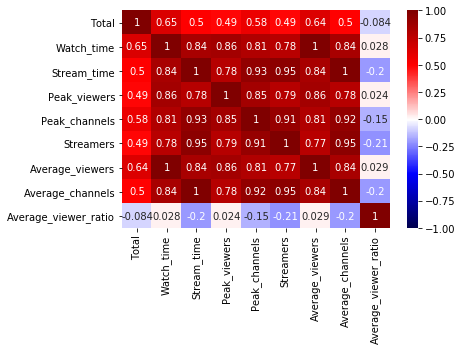

In [284]:
sns.heatmap(df_2018.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

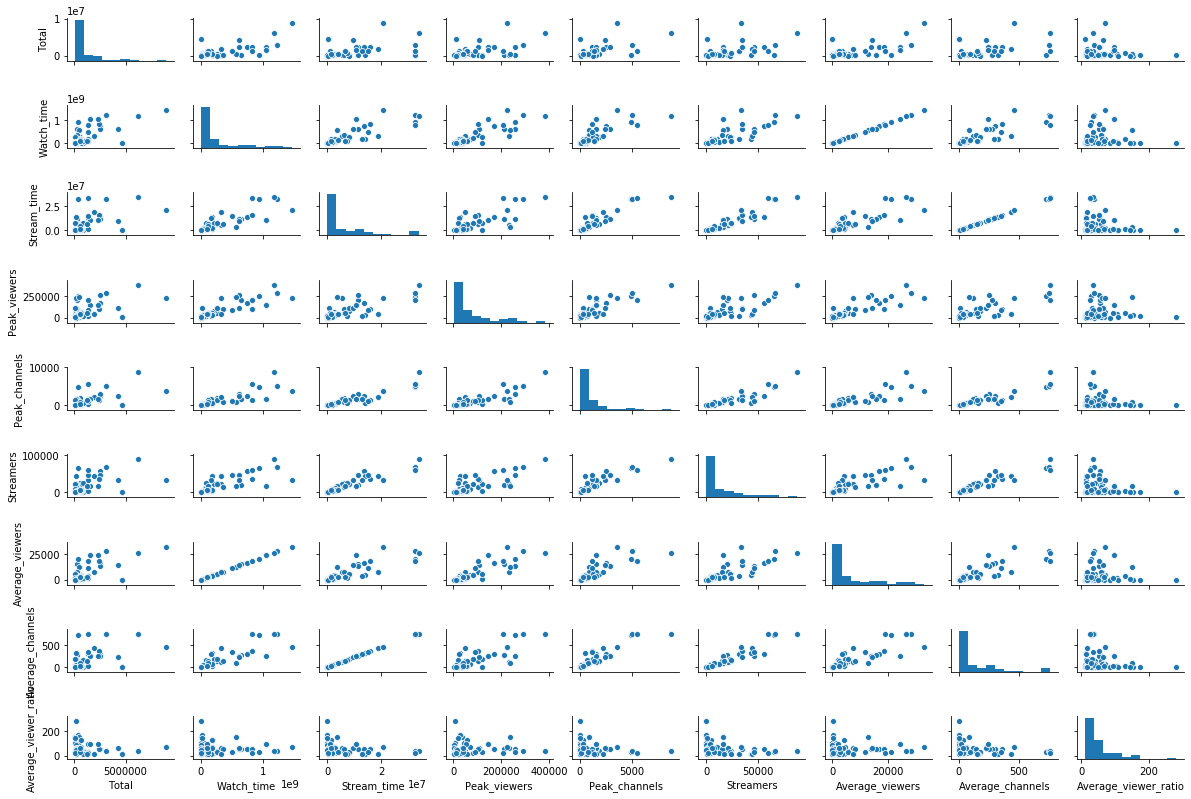

In [285]:
sns.pairplot(df_2018, height=1.2, aspect=1.5)

In [286]:
lm6 = smf.ols('Total ~ Watch_time + Stream_time + Peak_viewers + Peak_channels + Streamers + Average_viewers + Average_channels', data=df_2018)
fit = lm6.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     11.88
Date:                Fri, 01 May 2020   Prob (F-statistic):           4.72e-09
Time:                        17:45:51   Log-Likelihood:                -946.25
No. Observations:                  62   AIC:                             1909.
Df Residuals:                      54   BIC:                             1926.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.486e+05      2e+05      3.241      0.002    2.47e+05    1.05e+06
Watch_time           0.0935      0.037      2.557      0.013       0.020       0.167
Stream_time         -3.5030      1.759     -1.992      0.051      -7.029       0.023
Peak_viewers       -13.1813      4.108     -3.208      0.002     -21.418      -4.945
Peak_channels     1084.3849    302.224      3.588      0.001     478.462    1690.307
Streamers           15.9787     24.493      0.652      0.517     -33.128      65.085
Average_viewers  -3865.3331   1596.786     -2.421      0.019   -7066.697    -663.969
Average_channels  1.443e+05   7.63e+04      1.892      0.064   -8621.653    2.97e+05
==============================================================================
Omnibus:                       46.334   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.551
Skew:                           2.190   Prob(JB):                     1.52e-37
Kurtosis:                       9.816   Cond. No.                     6.42e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [287]:
lm7 = smf.ols('Total ~ Watch_time + Peak_viewers + Peak_channels + Average_channels', data=df_2018)
fit2 = lm7.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     17.70
Date:                Fri, 01 May 2020   Prob (F-statistic):           1.70e-09
Time:                        17:45:51   Log-Likelihood:                -950.12
No. Observations:                  62   AIC:                             1910.
Df Residuals:                      57   BIC:                             1921.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.959e+05   1.99e+05      2.992      0.004    1.97e+05    9.95e+05
Watch_time           0.0049      0.001      5.244      0.000       0.003       0.007
Peak_viewers       -12.7252      4.029     -3.158      0.003     -20.794      -4.657
Peak_channels     1120.1415    289.044      3.875      0.000     541.340    1698.943
Average_channels -7274.4977   2152.683     -3.379      0.001   -1.16e+04   -2963.824
==============================================================================
Omnibus:                       42.954   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.259
Skew:                           2.027   Prob(JB):                     1.74e-32
Kurtosis:                       9.339   Cond. No.                     6.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

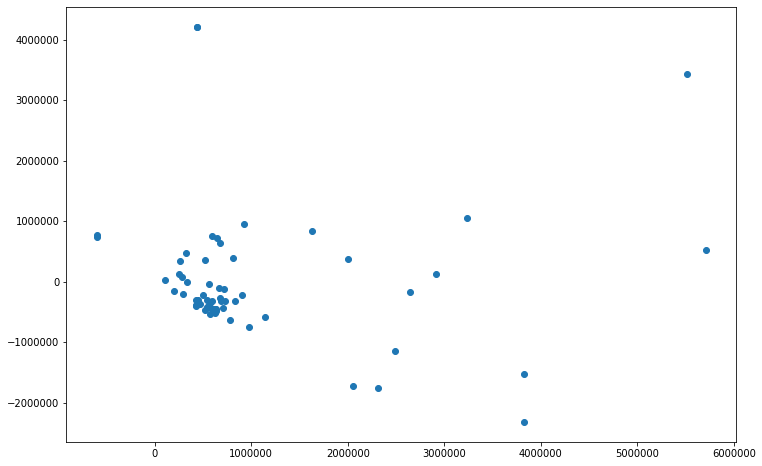

In [288]:
plt.figure(figsize=(12,8))
plt.scatter(fit2.predict(), fit2.resid)

<b><font color = 'blue'>We see an almost doubling of our R2 score and a bit more randomness on the residual plot.</font></b>

<b><font color = 'green'>Let's perform a log transformation on the target and see if we can normalize it.</font></b>

In [289]:
df_2018['log_total'] = np.log(df_2018['Total'])

In [290]:
lm8 = smf.ols('log_total ~ Watch_time + Stream_time + Peak_viewers + Peak_channels + Streamers + Average_viewers + Average_channels', data=df_2018)
fit3 = lm8.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_total   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     7.266
Date:                Fri, 01 May 2020   Prob (F-statistic):           3.97e-06
Time:                        17:45:51   Log-Likelihood:                -85.916
No. Observations:                  62   AIC:                             187.8
Df Residuals:                      54   BIC:                             204.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.4914      0.188     66.335      0.000      12.114      12.869
Watch_time        2.973e-08   3.44e-08      0.864      0.391   -3.93e-08    9.87e-08
Stream_time      -1.728e-06   1.65e-06     -1.044      0.301   -5.05e-06    1.59e-06
Peak_viewers     -1.107e-05   3.87e-06     -2.864      0.006   -1.88e-05   -3.32e-06
Peak_channels        0.0005      0.000      1.922      0.060   -2.34e-05       0.001
Streamers         4.639e-05    2.3e-05      2.013      0.049    1.84e-07    9.26e-05
Average_viewers     -0.0011      0.002     -0.753      0.455      -0.004       0.002
Average_channels     0.0685      0.072      0.955      0.344      -0.075       0.212
==============================================================================
Omnibus:                        8.186   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.500
Skew:                           0.607   Prob(JB):                       0.0143
Kurtosis:                       4.348   Cond. No.                     6.42e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [291]:
lm9 = smf.ols('log_total ~ Peak_viewers + Peak_channels + Streamers', data=df_2018)
fit4 = lm9.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_total   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     8.361
Date:                Fri, 01 May 2020   Prob (F-statistic):           0.000104
Time:                        17:45:51   Log-Likelihood:                -95.348
No. Observations:                  62   AIC:                             198.7
Df Residuals:                      58   BIC:                             207.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.4047      0.207     59.975      0.000      11.991      12.819
Peak_viewers  -4.104e-07   3.29e-06     -0.125      0.901      -7e-06    6.18e-06
Peak_channels     0.0003      0.000      1.008      0.317      -0.000       0.001
Streamers      1.818e-05   1.74e-05      1.045      0.300   -1.66e-05     5.3e-05
==============================================================================
Omnibus:                        1.286   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.526   Jarque-Bera (JB):                0.687
Skew:                           0.216   Prob(JB):                        0.709
Kurtosis:                       3.280   Cond. No.                     1.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

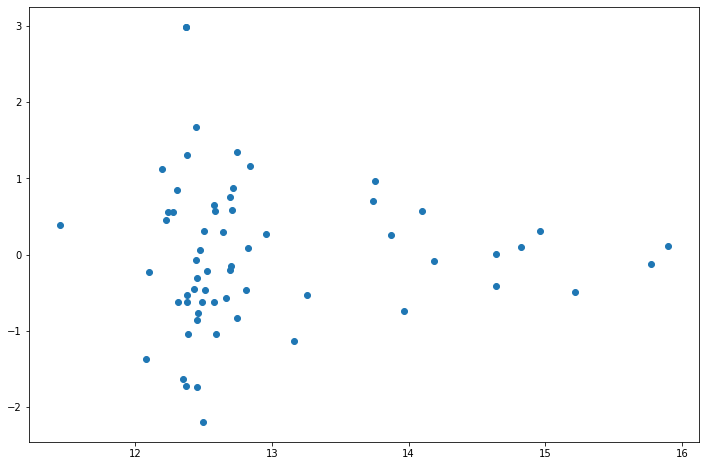

In [292]:
plt.figure(figsize=(12,8))
plt.scatter(fit3.predict(), fit3.resid)

## Now, we will working with scikit-learn for our splitting and validation phase.

In [293]:
X = df_2018.loc[:,['Watch_time', 'Peak_viewers', 'Peak_channels', 'Average_channels']]
y = df_2018['Total']

<b><font color = 'blue'> Function for validation</font></b>

In [294]:
def split_and_validate(X, y):
    
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    val_score = lr_model.score(X_val, y_val)

    val_score_2 = 1.0 - (1 - val_score) * (X_val.shape[0] - 1.) / (X_val.shape[0] - X_val.shape[1] - 1.)
    
    print('\nValidation R^2 score was:', val_score)
    print('\nValidation Adj R^2 score was:', val_score_2)

    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [295]:
split_and_validate(X, y)


Validation R^2 score was: -0.9357500025066927

Validation Adj R^2 score was: -1.9036250037600393
Feature coefficient results: 

Watch_time : 0.01
Peak_viewers : -17.87
Peak_channels : 1461.63
Average_channels : -9405.54


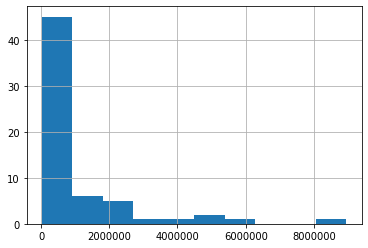

In [296]:
df_2018.Total.hist()

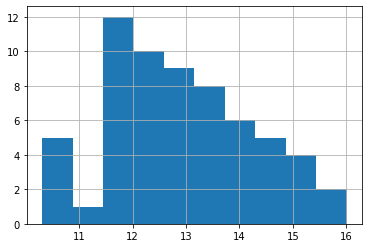

In [297]:
np.log(df_2018.Total).hist()

Lambda: -8.048529021136567


C:\Users\gugla\anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


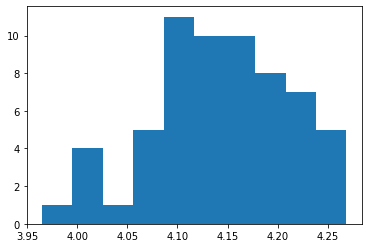

In [298]:
import scipy.stats as stats

# boxcox transformation on the distribution of total units
lamb=stats.boxcox_normmax(df_2018.Total, brack=(-1.9, 1.9)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
y_t=(np.power(df_2018.Total,-0.2282)-1)/-0.2282

plt.hist(y_t);

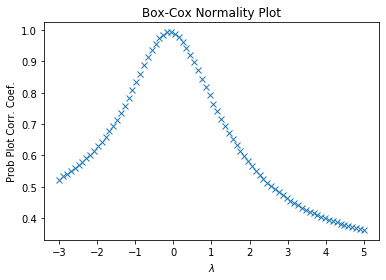

In [299]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(df_2018.Total, -3, 5, plot=ax)

<b>let's do a test in sk learn.</b>

In [300]:
X = df_2018.loc[:,['Watch_time', 'Peak_viewers', 'Peak_channels', 'Average_channels']]
y = df_2018['Total']

In [301]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2)

In [302]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25)

In [303]:
lm = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [304]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: -0.803
Ridge Regression val R^2: 0.184
Degree 2 polynomial regression val R^2: -4.326


In [305]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.723


# CONCLUSION

From the above analysis we can reasonably state that there isn't a huge signal between many of our features and our target. Instead, there is a pretty dramatic signal consistently from the peak channels coefficient especially in the first 4 weeks of a game's release. A game sale is more in the first 4 weeks of a game release, if it is streamed on twitch.